# PROJECT : PRCP-1001-RiceLeaf

## PROJECT OVERVIEW

# This project focuses on identifying and classifying common rice leaf diseases using deep learning techniques. The goal is to develop a robust model that can accurately detect **Leaf Blast, Bacterial Blight, and Brown Spot** from leaf images. Additionally, we explore various **data preprocessing and augmentation** techniques to enhance model performance.


## IMPORT NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 5
epochs = 30

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## LOAD THE DATA

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/My Drive/Rice Leaf Diseases",
                                                   labels='inferred',
                                                   label_mode='int',
                                                   class_names=None,
                                                   color_mode='rgb',
                                                   image_size=input_shape_2D,
                                                   seed=seed)

Found 119 files belonging to 3 classes.


In [ ]:
# Print the class names.

class_names = data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

### The 3 classes are - Bacterial leaf blight, Brown spot and Leaf smut.

## DOMAIN EXPERTISE
- The dataset includes 119 jpg images of rice leaves effected by different types of diseases.
The classes are:-

**Bacterial Leaf Blight**
-  Bacterial leaf blight of rice (BB) is a disease caused by the Gram-negative bacterium Xanthomonas oryzae pv. Bacterial leaf blight is often first noticed in the fields as brown areas about 3 to 4 feet in diameter. Leaf symptoms appear as irregular brown spots, often beginning on the leaf margins. Lesions initially have an irregular yellow halo and may appear watersoaked.

**Brown Spot**
- Brown spot is a fungal disease that can infect both seedlings and mature plants. The disease causes blight on seedlings, which are grown from heavily infected seeds and can cause 10-58% seedling mortality.

**Leaf Smut**
- Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice. The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves. The black spots are about 0.5 to 5.0 millimeters long and 0.5 to 1.5 millimeters wide.

**The class Leaf Smut contains 39 jpg images while rest all classes contain 40 jpg images.**

In [ ]:
# Initialize an empty dictionary to store class counts.
class_counts = {}

# Iterate through the dataset to count occurrences of each class label.
for images, labels in data:
    for label in labels:
        class_counts[label.numpy()] = class_counts.get(label.numpy(), 0) + 1

# Print the class counts.
print(class_counts)

{0: 40, 1: 40, 2: 39}


## IMAGE VISUALIZATION

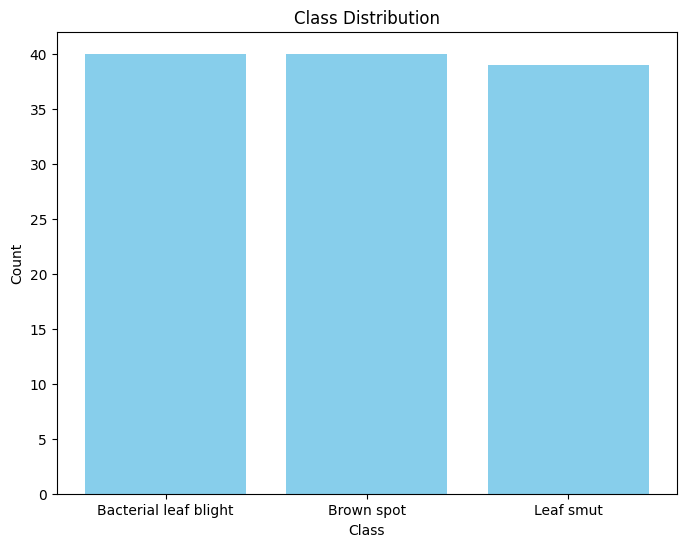

In [ ]:
# Class names and counts
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
class_counts = [40, 40, 39]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

From the graph, we can clearly see that there are total 119 images.
- 40 images are Bacterial Leaf Blight.
- 40 images are Brown Spot.
- 39 images available in Leaf Smut.

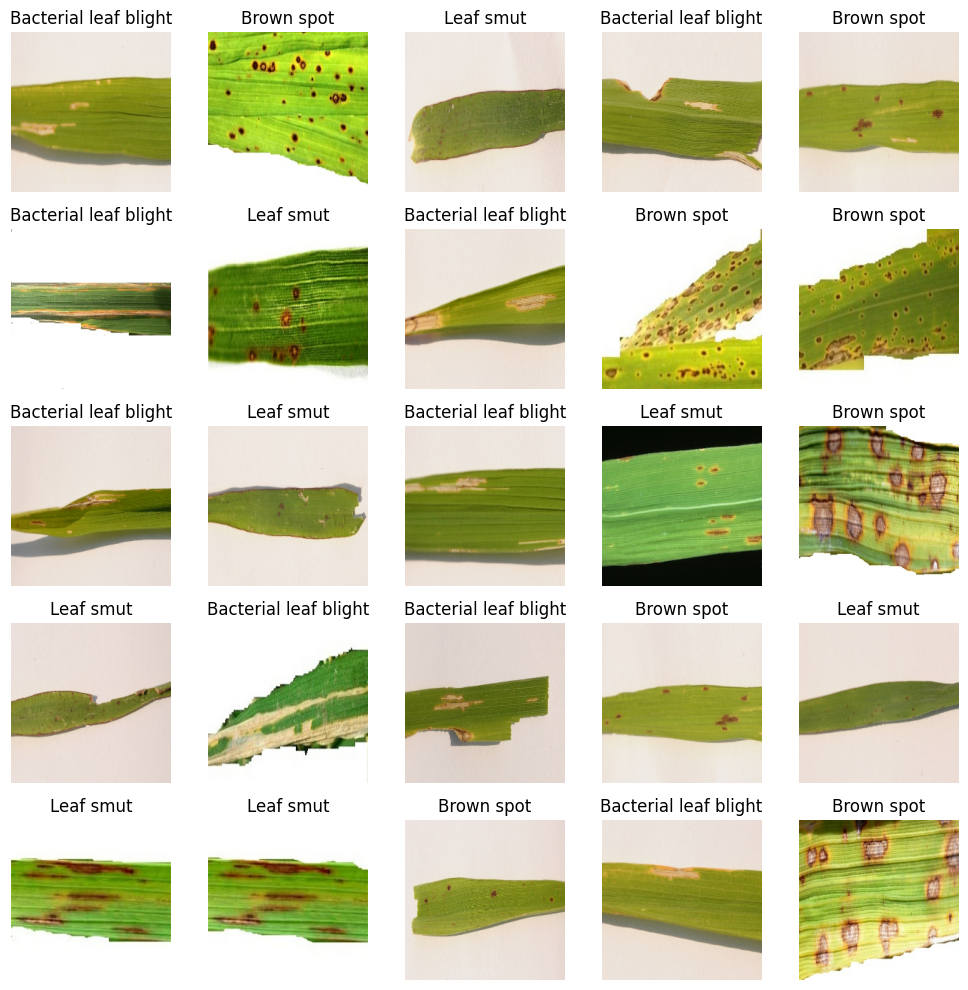

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

#### These are the inputs of our model.

In [ ]:
# Create Dependent(y) and Independent(X) variable.
X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())


# Convert X, y list into numpy array.
X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)

In [ ]:
X

array([[[[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        [[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        [[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        ...,

        [[ 10.238839 ,  11.238839 ,   

In [ ]:
X = X.astype('float32')/255

## SPLIT DATASET INTO TRAIN & TEST/VALIDATION DATA

In [ ]:
# Splitt data into train and test/validation.

X_train, X_test = X[:95 ],X[95:]
y_train, y_test = y[:95] ,y[95:]

In [ ]:
X_train.shape, X_test.shape

((95, 224, 224, 3), (24, 224, 224, 3))

In [ ]:
y_train.shape, y_test.shape

((95,), (24,))

In [ ]:
# Convert labels to one-hot encoding.

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))

## MODEL CREATION

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# relu - the usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network.
# It has a derivative of either 0 or 1, depending on whether its input is negative or not.

model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(128, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(3, activation='softmax')])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 9s 2s/step - loss: 3.8183 - accuracy: 0.2368 - val_loss: 1.3880 - val_accuracy: 0.3158
Epoch 2/30
3/3 [==============================] - 9s 2s/step - loss: 1.2764 - accuracy: 0.2895 - val_loss: 0.9359 - val_accuracy: 0.4737
Epoch 3/30
3/3 [==============================] - 10s 4s/step - loss: 1.0095 - accuracy: 0.5132 - val_loss: 1.0060 - val_accuracy: 0.4737
Epoch 4/30
3/3 [==============================] - 8s 2s/step - loss: 1.0599 - accuracy: 0.4474 - val_loss: 0.8966 - val_accuracy: 0.4737
Epoch 5/30
3/3 [==============================] - 9s 3s/step - loss: 0.8841 - accuracy: 0.6447 - val_loss: 0.9263 - val_accuracy: 0.4737
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 0.8195 - accuracy: 0.6053 - val_loss: 0.8446 - val_accuracy: 0.7368
Epoch 7/30
3/3 [==============================] - 9s 3s/step - loss: 0.7624 - accuracy: 0.6053 - val_loss: 0.8444 - val_accuracy: 0.4737
Epoch 8/30
3/3 [========================

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


1/1 [==============================] - 1s 593ms/step - loss: 0.9623 - accuracy: 0.5833
Test accuracy: 0.5833


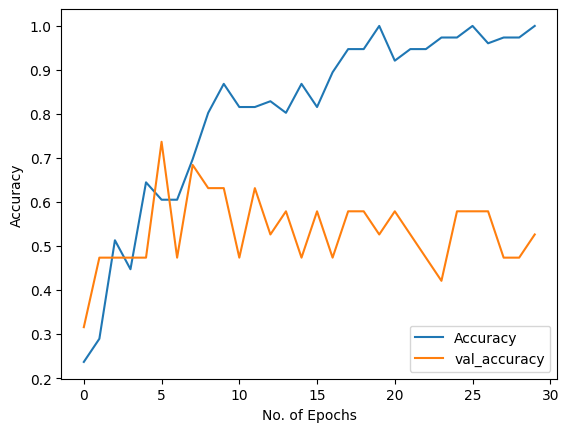

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

### The model shows only 58% accuracy, so we are doing the Data Augmentation to improve the accuracy.

## DATA AUGMENTATION

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rotation_range=45,
                             width_shift_range=0.25,
                             height_shift_range=0.25,
                             shear_range=0.25,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


## Model Creation using different Optimizers after Data Augmentation:

## 1) Adam Optimizer

In [ ]:

def create_model(input_shape, num_classes):
  model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
                      MaxPooling2D((2, 2)),
                      Conv2D(64, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Conv2D(128, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Conv2D(256, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Flatten(),
                      Dense(256, activation='relu'),
                      Dropout(0.5),
                      Dense(num_classes, activation='softmax')])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 3
model_da = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_da.fit(augmented_data, epochs=50, steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 15s 4s/step - loss: 1.3746 - accuracy: 0.3368 - val_loss: 1.1124 - val_accuracy: 0.2500
Epoch 2/50
3/3 [==============================] - 13s 4s/step - loss: 1.0735 - accuracy: 0.3684 - val_loss: 1.1126 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 14s 5s/step - loss: 1.0872 - accuracy: 0.3158 - val_loss: 1.1195 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 14s 5s/step - loss: 1.1010 - accuracy: 0.3895 - val_loss: 1.0634 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 15s 5s/step - loss: 1.0719 - accuracy: 0.4211 - val_loss: 1.0609 - val_accuracy: 0.3333
Epoch 6/50
3/3 [==============================] - 14s 5s/step - loss: 1.0724 - accuracy: 0.4737 - val_loss: 1.0580 - val_accuracy: 0.4167
Epoch 7/50
3/3 [==============================] - 13s 4s/step - loss: 1.0189 - accuracy: 0.4842 - val_loss: 1.0555 - val_accuracy: 0.4583
Epoch 8/50
3/3 [==================

In [ ]:
test_loss, test_accuracy = model_da.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 950ms/step - loss: 0.5175 - accuracy: 0.8333
Test accuracy: 0.8333


### The model shows an accuracy of 83% for Adam Optimizer.

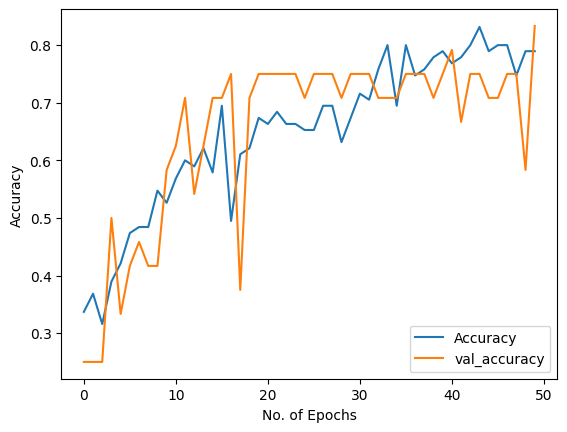

In [ ]:
# Plotting the Accuracy and Validation Accuracy.
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

## 2) RMSprop Optimizer

In [ ]:
def create_model(input_shape, num_classes):
  model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
                      MaxPooling2D((2, 2)),
                      Conv2D(64, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Conv2D(128, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Conv2D(256, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Flatten(),
                      Dense(256, activation='relu'),
                      Dropout(0.5),
                      Dense(num_classes, activation='softmax')])
  model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 3
model_rms = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_rms.fit(augmented_data, epochs=50, steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 14s 4s/step - loss: 2.4563 - accuracy: 0.3263 - val_loss: 1.0839 - val_accuracy: 0.4167
Epoch 2/50
3/3 [==============================] - 14s 4s/step - loss: 1.1032 - accuracy: 0.3263 - val_loss: 1.0995 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 14s 4s/step - loss: 1.1134 - accuracy: 0.2632 - val_loss: 1.1039 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 14s 4s/step - loss: 1.0913 - accuracy: 0.3895 - val_loss: 1.0939 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 14s 4s/step - loss: 1.0934 - accuracy: 0.3474 - val_loss: 1.0896 - val_accuracy: 0.4583
Epoch 6/50
3/3 [==============================] - 13s 4s/step - loss: 1.0775 - accuracy: 0.4211 - val_loss: 1.0839 - val_accuracy: 0.5417
Epoch 7/50
3/3 [==============================] - 14s 5s/step - loss: 1.0851 - accuracy: 0.3895 - val_loss: 1.0905 - val_accuracy: 0.2917
Epoch 8/50
3/3 [==================

In [ ]:
test_loss, test_accuracy = model_rms.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 709ms/step - loss: 0.6254 - accuracy: 0.7500
Test accuracy: 0.7500


### The model shows an accuracy of 75% for RMSprop Optimizer.

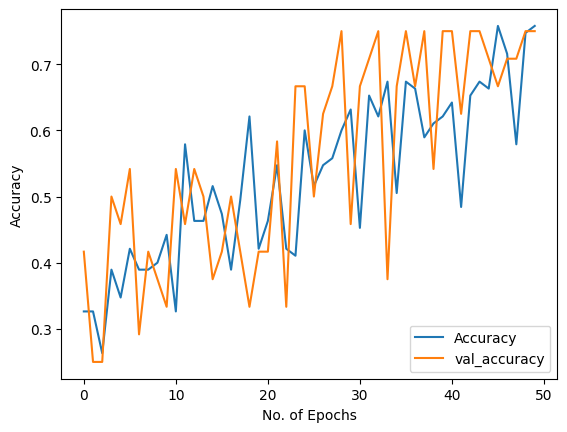

In [ ]:
# Plotting the Accuracy and Validation Accuracy.
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

## 3) SGD Optimizer

In [ ]:
def create_model(input_shape, num_classes):
  model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
                      MaxPooling2D((2, 2)),
                      Conv2D(64, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Conv2D(128, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Conv2D(256, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Flatten(),
                      Dense(256, activation='relu'),
                      Dropout(0.5),
                      Dense(num_classes, activation='softmax')])
  model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 3
model_sgd = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_sgd.fit(augmented_data, epochs=50, steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 14s 4s/step - loss: 1.1371 - accuracy: 0.2947 - val_loss: 1.0881 - val_accuracy: 0.4167
Epoch 2/50
3/3 [==============================] - 14s 5s/step - loss: 1.1033 - accuracy: 0.2842 - val_loss: 1.0955 - val_accuracy: 0.4167
Epoch 3/50
3/3 [==============================] - 14s 5s/step - loss: 1.1111 - accuracy: 0.2842 - val_loss: 1.1084 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 14s 5s/step - loss: 1.1046 - accuracy: 0.3684 - val_loss: 1.1003 - val_accuracy: 0.3333
Epoch 5/50
3/3 [==============================] - 13s 5s/step - loss: 1.1042 - accuracy: 0.2632 - val_loss: 1.1144 - val_accuracy: 0.2500
Epoch 6/50
3/3 [==============================] - 13s 4s/step - loss: 1.1032 - accuracy: 0.3474 - val_loss: 1.1049 - val_accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 13s 5s/step - loss: 1.1146 - accuracy: 0.2737 - val_loss: 1.0953 - val_accuracy: 0.3333
Epoch 8/50
3/3 [==================

In [ ]:
test_loss, test_accuracy = model_sgd.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 698ms/step - loss: 1.0852 - accuracy: 0.3750
Test accuracy: 0.3750


### The model shows an accuracy of 38% for SGD Optimizer.

*   List item
*   List item



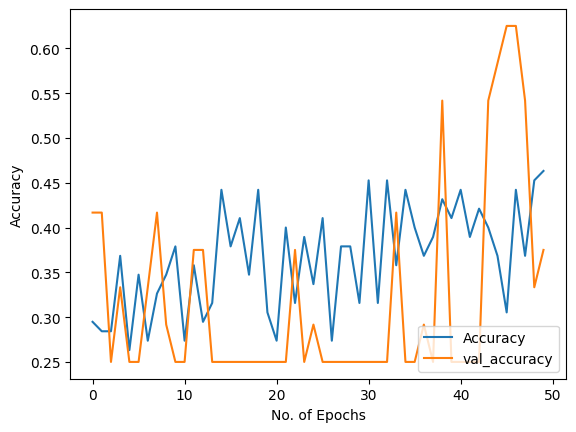

In [ ]:
# Plotting the Accuracy and Validation Accuracy.
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

## 4) Adagrad Optimizer

In [ ]:
def create_model(input_shape, num_classes):
  model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
                      MaxPooling2D((2, 2)),
                      Conv2D(64, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Conv2D(128, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Conv2D(256, (3, 3), activation='relu'),
                      MaxPooling2D((2, 2)),
                      Flatten(),
                      Dense(256, activation='relu'),
                      Dropout(0.5),
                      Dense(num_classes, activation='softmax')])
  model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 3
model_adagrad = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_adagrad.fit(augmented_data, epochs=50, steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 15s 4s/step - loss: 1.0952 - accuracy: 0.3789 - val_loss: 1.0951 - val_accuracy: 0.4167
Epoch 2/50
3/3 [==============================] - 14s 5s/step - loss: 1.1064 - accuracy: 0.2316 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 3/50
3/3 [==============================] - 15s 5s/step - loss: 1.0982 - accuracy: 0.3684 - val_loss: 1.0995 - val_accuracy: 0.3333
Epoch 4/50
3/3 [==============================] - 13s 4s/step - loss: 1.1053 - accuracy: 0.2632 - val_loss: 1.0991 - val_accuracy: 0.4167
Epoch 5/50
3/3 [==============================] - 14s 4s/step - loss: 1.0943 - accuracy: 0.3895 - val_loss: 1.1002 - val_accuracy: 0.2917
Epoch 6/50
3/3 [==============================] - 14s 5s/step - loss: 1.1026 - accuracy: 0.2842 - val_loss: 1.0992 - val_accuracy: 0.2917
Epoch 7/50
3/3 [==============================] - 14s 5s/step - loss: 1.1040 - accuracy: 0.2842 - val_loss: 1.0999 - val_accuracy: 0.2917
Epoch 8/50
3/3 [==================

In [ ]:
test_loss, test_accuracy = model_adagrad.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 1.0944 - accuracy: 0.2500
Test accuracy: 0.2500


### The model shows an accuracy of 25% for Adagrad Optimizer.

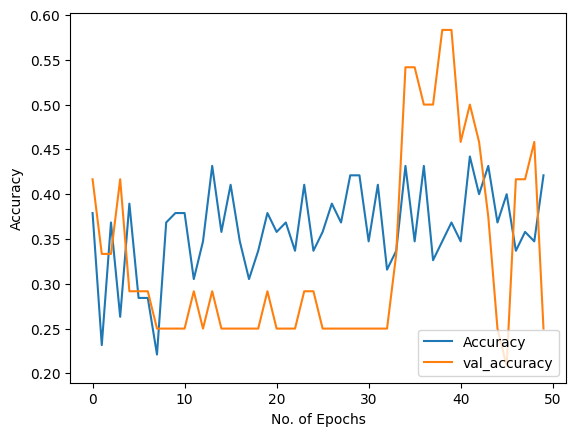

In [ ]:
# Plotting the Accuracy and Validation Accuracy.
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

## ACCURACY OF THE MODEL WITH DIFFERENT OPTIMIZERS:

- 1) Adam Optimizer shows an accuracy score of 83.33%.
- 2) RMSprop Optimizer shows an accuracy score of 75%.
- 3) SGD Optimizer shows an accuracy score of 37.5%.
- 4) Adagrad Optimizer shows an accuracy score of 25%.

From all of the Optimizer, **Adam Optimizer** shows the highest Accuracy score of **83.33%**.

## PREDICTING THE CLASS OF DISEASE BY USING ADAM OPTIMIZER MODEL:

In [ ]:
# Make prediction for X_test

y_prediction = model_da.predict(X_test)
leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 1s 1s/step


In [ ]:
# Get the predicted class for each sample

predicted_classes = np.argmax(y_prediction, axis=1)
print(predicted_classes)

[2 0 2 1 2 2 2 2 0 2 0 0 1 0 2 2 0 0 0 1 0 0 2 0]


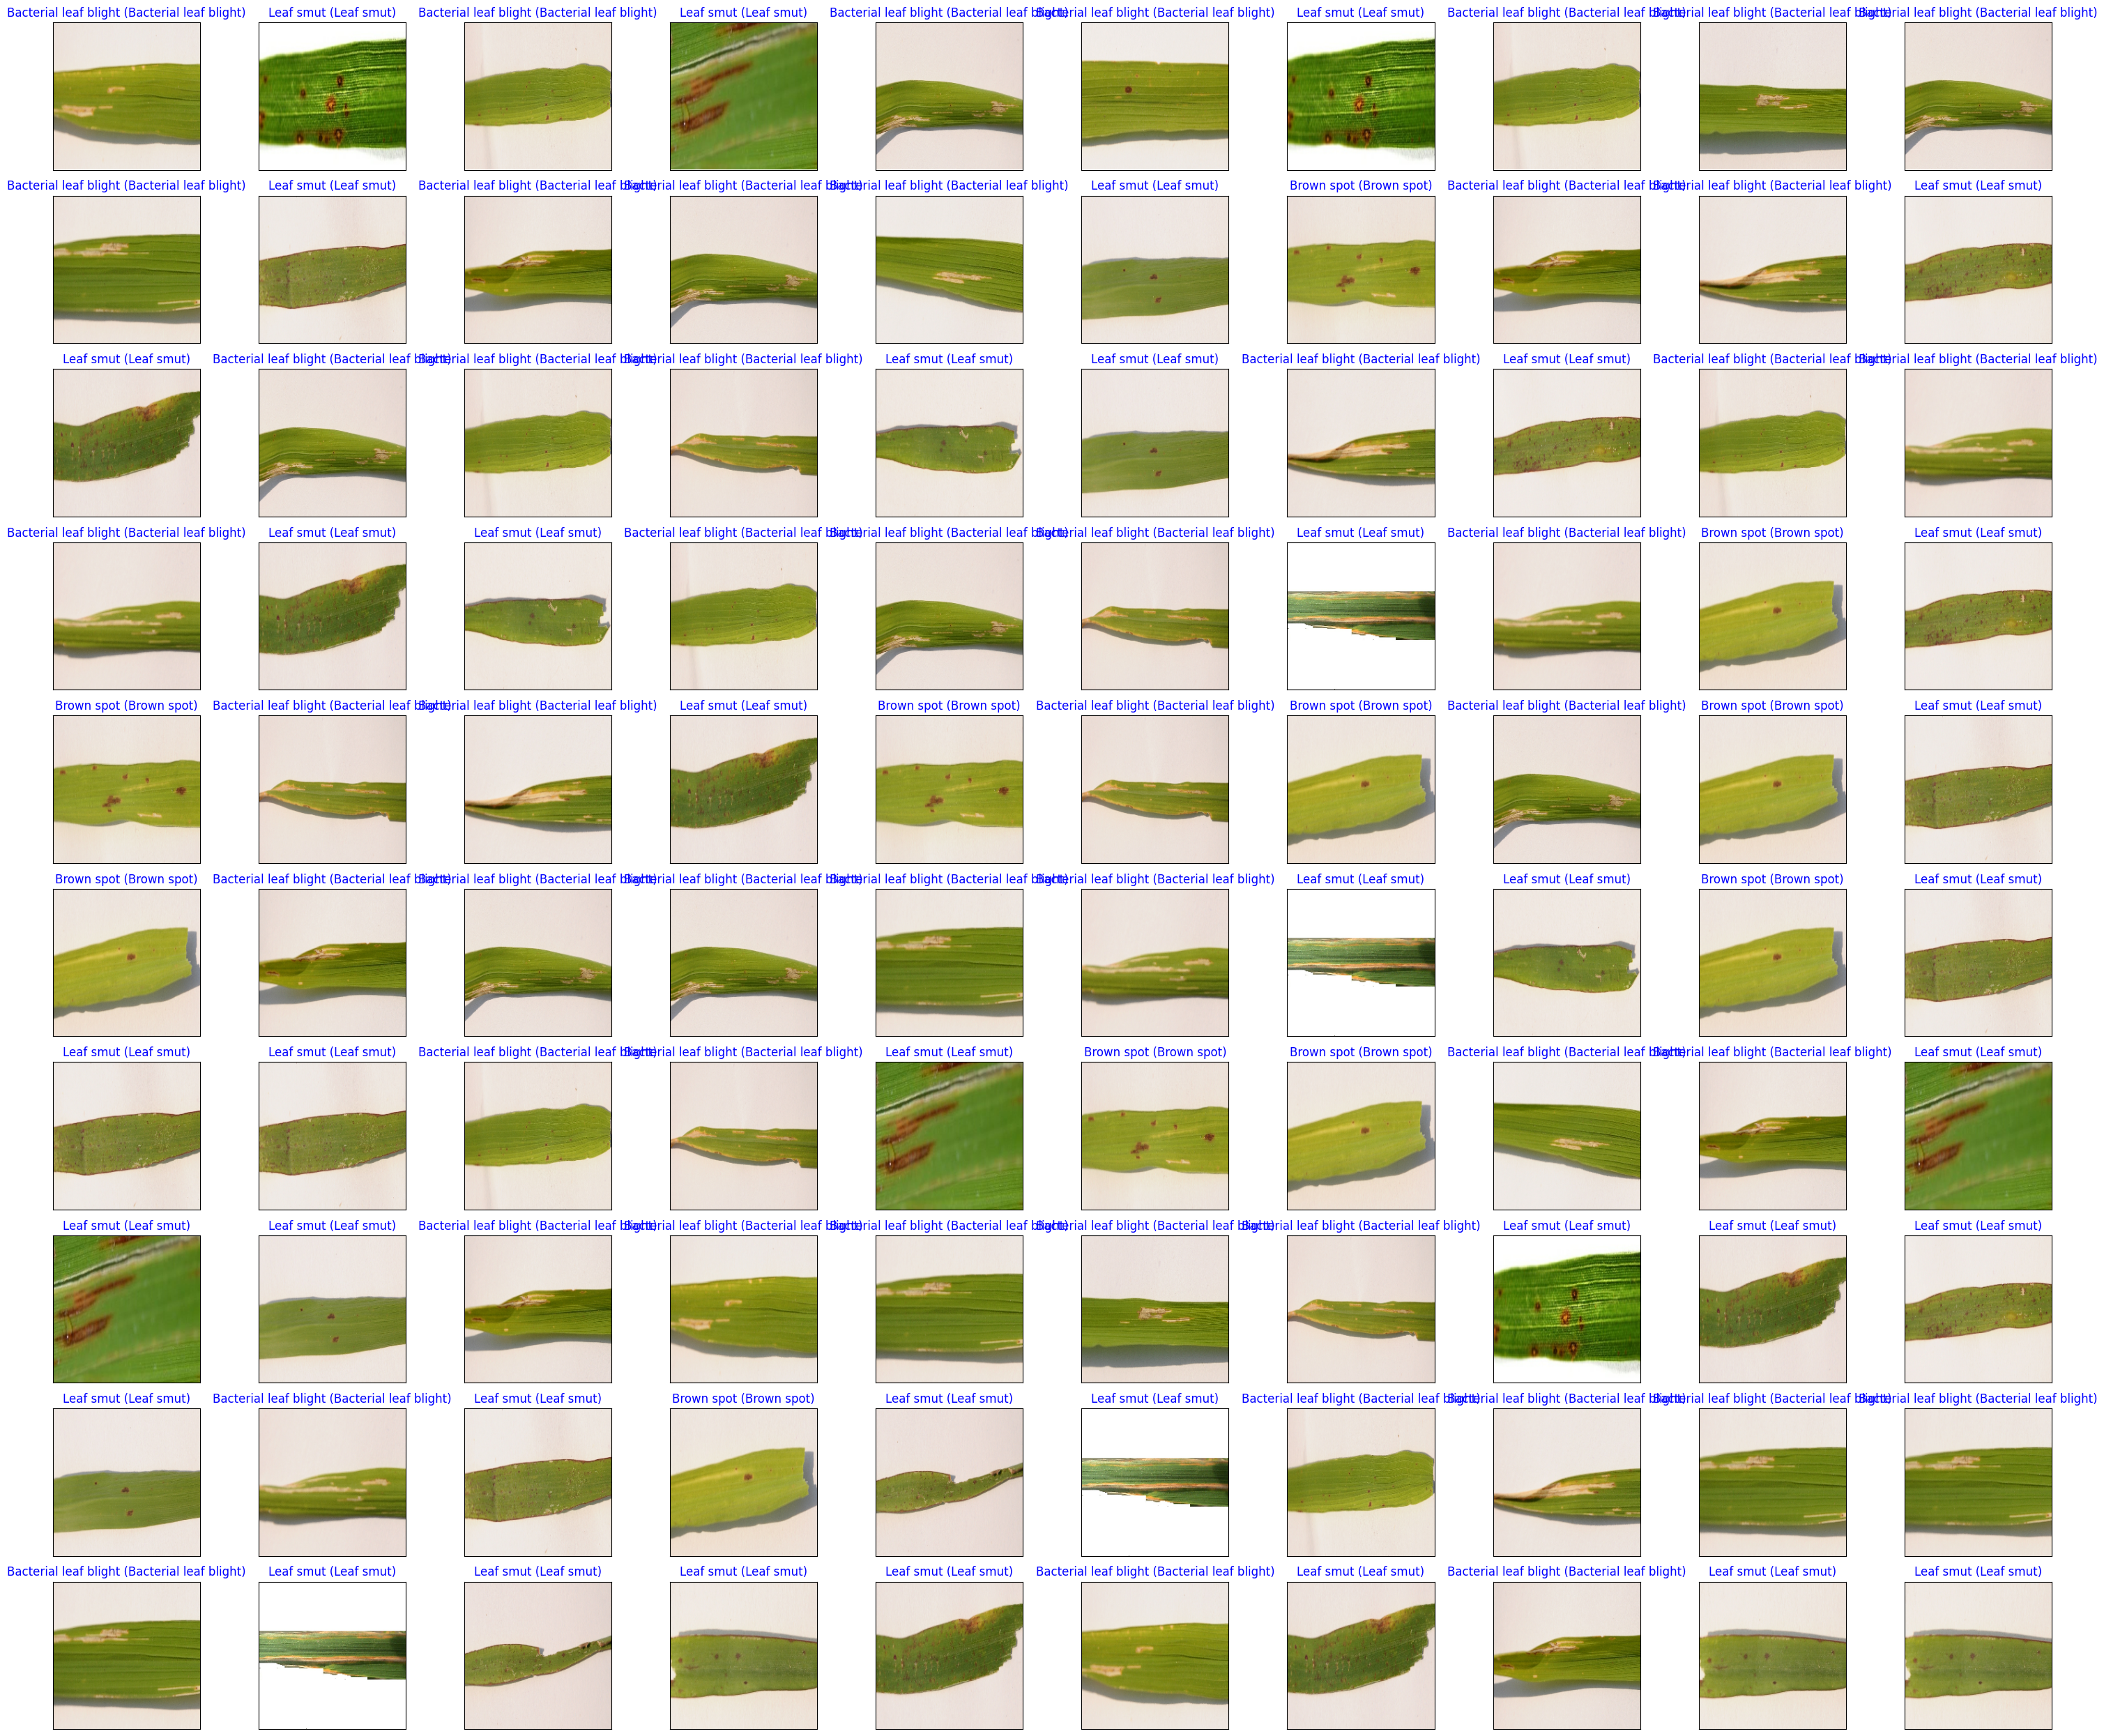

In [ ]:
# Assuming that you have 'y_hat' for predictions and 'y_test' for ground truth.
# Assuming that 'leaf_class' is a list of class labels.

# Plot a random sample of test images, their predicted labels and ground truth.
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=100, replace=True)):
  ax = fig.add_subplot(10,10, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_test[idx]))

  # Assuming that 'y_hat' contains the model predictions.
  pred_idx = np.argmax(y_prediction[idx])

  true_idx = np.argmax(y_prediction[idx])

  ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
               color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

### For checking the performance, we took 100 samples and 100 samples were accurately predicted.

In [ ]:
# Print Accuracy

test_Accuracy = model_da.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

1/1 [==============================] - 1s 1s/step - loss: 0.5175 - accuracy: 0.8333
Model's Accuracy : 83.33333134651184


In [ ]:
# Save the Model:

# Save the model architecture as JSON
model_json = model_da.to_json()
with open("/content/drive/My Drive/Rice Leaf Diseases/model_json", "w") as json_file:
  json_file.write(model_json)


# Save the model weights
model_da.save_weights("/content/drive/My Drive/Rice Leaf Diseases/model_weights.h5")

In [ ]:
import cv2
from keras.models import model_from_json
from keras.preprocessing import image

# Load the model architecture from JSON.
with open('/content/drive/My Drive/Rice Leaf Diseases/model_json', 'r') as json_file:
  loaded_model_json = json_file.read()
  loaded_model = model_from_json(loaded_model_json)

# Load the model weights.
loaded_model.load_weights("/content/drive/My Drive/Rice Leaf Diseases/model_weights.h5")

## PREDICTING THE DISEASE USING THE IMAGE FROM GOOGLE BY ITS URL:

In [ ]:
import urllib

# Define a dictionary mapping class indices to class labels.
class_labels = {0: 'Bacterial leaf blight', 1: 'Brown spot', 2:'Leaf smut' }


def predict_image_from_url():
  # Prompt user to enter image URL
  image_url = input("Enter the URL of the image: ")

  # Load image from the URL
  resp = urllib.request.urlopen(image_url)
  img = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Preprocess the image
  img = cv2.resize(img, (224, 224))  # Adjust input size according to your model's input shape.
  img = img.astype('float32')
  img /= 255.0  # Normalize the pixel values.
  img = np.expand_dims(img, axis=0)

  # Make the prediction
  prediction = loaded_model.predict(img)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = class_labels.get(predicted_class_index, "Unknown")

  # Print the prediction
  print("Predicted class:", predicted_class_name)

  # Print prediction
  print("Predicted class index:", predicted_class_index)
  # You can map the index to class label based on your model's classes.

# Example usage
predict_image_from_url()

# Conclusion:-

- The dataset contains 119 jpg images of different Rice Leaf diseases.
- Here, we tried 4 Optimizers for model creation in which **Adam Optimizer** shows the highest accuracy score of **83.33%**. Thus we can conclude that it works well for the Rice Leaf Disease Detection.
- By using the Adam Optimizer, we tried it with the 100 samples of test data and it showed a great output and later we tried it with image by using the URL. The model accurately predicted them.
- Thus we can conclude that the CNN model with Adam Optimizer is the best one for predicting the Rice Leaf Disease Prediction.

# Suggestions:-
- As an Asian, Rice plays a major role in our daily diet. Thus production of healthy rice are very important as well.

Some of the suggestions from our Analysis are:-
- Taking the prevention method before the disease get worse.
- Awareness programs for every farmers throughout the country.
- Give proper instructions, effects and prevention methods.
- Provide proper pesticides, fertilizers and quality seeds by the Government; it can make a big change in farmer's life.

# Risks:-

- Data Loading and processing.
- High computational time.
- Optimizers showing less accuracy score.
- Less information.